In [291]:
#生成随机连续序列数据，波动不超过1
import numpy as np
def generate_random_sequence(length, start=0, max_change=1, bias=0):
    sequence = [start]
    for _ in range(1, length):
        change = np.random.uniform(-max_change, max_change)
        next_value = sequence[-1] + change + bias
        sequence.append(next_value)
    return sequence
def generate_sine_wave(length, frequency=1, amplitude=1, phase=0):
    x = np.linspace(0, 2 * np.pi * frequency, length)
    return amplitude * np.sin(x + phase)
def generate_linear_trend(length, slope=1, intercept=0):
    return [slope * i + intercept for i in range(length)]
data_size = 400
# s=generate_random_sequence(data_size, start=5, max_change=1, bias=0.2)
s = generate_sine_wave(data_size, frequency=5, amplitude=1, phase=0)
# s = generate_linear_trend(data_size, slope=0.1, intercept=0)

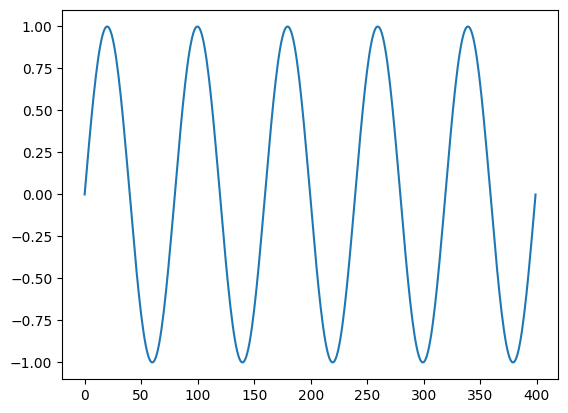

In [292]:
import matplotlib.pyplot as plt
plt.plot(s);

In [293]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# 生成随机数据
X = np.array([[i] for i in range(len(s))])  # 特征为索引
y = np.array(s)  # 标签为序列值
# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

train_size=int(data_size*0.8)
X_train, X_test = X[:train_size], X[train_size:]  # 前80个作为训练集，后20个作为测试集
y_train, y_test = y[:train_size], y[train_size:]  # 对应的

In [294]:
# 计算时间序列的移动平均值
def moving_average(data, window_size):
    moving_avg = []
    for i in range(window_size, len(data)):
        average = np.mean(data[i-window_size:i])
        moving_avg.append(average)
    return moving_avg

window_size = 5
train_features = moving_average(y_train, window_size)

train_features=np.array(train_features).reshape(-1, 1)

print("训练集特征:", train_features.size)

训练集特征: 315


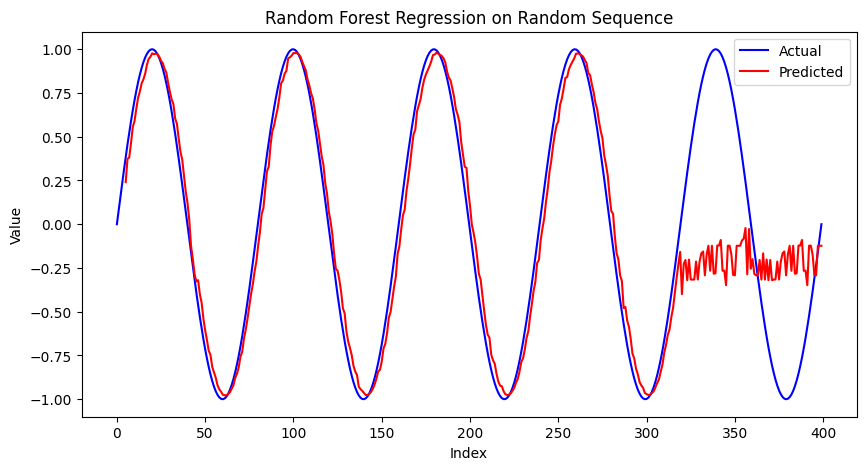

In [296]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)
# y_ = model.predict(X)
model.fit(train_features, y_train[window_size:])  # 使用移动平均特征进行训练
y_ = model.predict(train_features).tolist()
while len(y_) < len(X) - window_size:
    next_pred = model.predict(np.array([np.mean(y_[-window_size:])]).reshape(1, -1))[0]
    y_.append(next_pred)
# mse = mean_squared_error(y_test, y_pred)
# print(f"Mean Squared Error: {mse}")
plt.figure(figsize=(10, 5))
plt.plot(X, y, label='Actual', color='blue')
# plt.plot(X, y_, label='Predicted', color='red')
plt.plot(X[window_size:], y_, label='Predicted', color='red')
plt.title('Random Forest Regression on Random Sequence')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.show()